<a href="https://colab.research.google.com/github/BensalemHafsa/ML-Project-Churn-Prediction-/blob/main/Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Importing_Libraries**

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**#Reading_Dataset**

In [128]:
Telecom = pd.read_csv("Churn.csv")

In [129]:
Telecom.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [130]:
Telecom.drop(["Customer ID"], axis=1, inplace=True)

In [131]:
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7044 non-null   object 
 1   Senior Citizen     7044 non-null   int64  
 2   Partner            7044 non-null   object 
 3   Dependents         7044 non-null   object 
 4   tenure             7044 non-null   int64  
 5   Phone Service      7044 non-null   object 
 6   Multiple Lines     7044 non-null   object 
 7   Internet Service   7044 non-null   object 
 8   Online Security    7044 non-null   object 
 9   Online Backup      7044 non-null   object 
 10  Device Protection  7044 non-null   object 
 11  Tech Support       7044 non-null   object 
 12  Streaming TV       7044 non-null   object 
 13  Streaming Movies   7044 non-null   object 
 14  Contract           7044 non-null   object 
 15  Paperless Billing  7044 non-null   object 
 16  Payment Method     7044 

In [132]:
Telecom.describe()

,Senior Citizen,tenure,Monthly Charges
count,7044.000000,7044.000000,7044.000000
mean,0.162124,32.366695,64.756736
std,0.368590,24.560582,30.090786
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [133]:
Telecom = Telecom.drop_duplicates()
Telecom.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [134]:
Telecom.dropna(inplace = True)
Telecom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Telecom['Churn'].replace(to_replace='No',  value=0, inplace=True)
Telecom.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**#Scatter_plot**

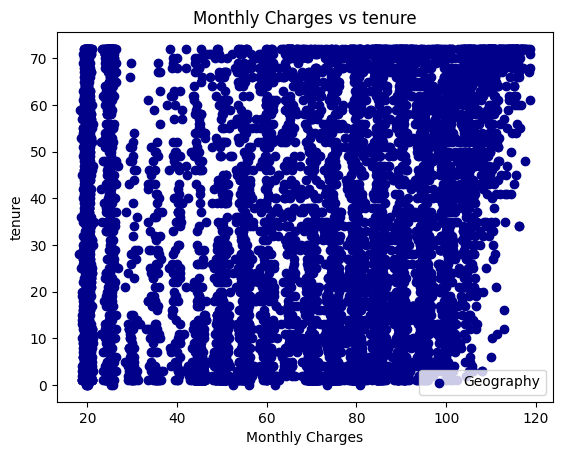

In [135]:
plt.scatter(data=Telecom, x="Monthly Charges", y="tenure", color="darkblue", label="Geography")
plt.legend()
plt.title("Monthly Charges vs tenure")
plt.xlabel("Monthly Charges")
plt.ylabel("tenure")
plt.show()

**#Pie_Plot**

<function matplotlib.pyplot.show(close=None, block=None)>

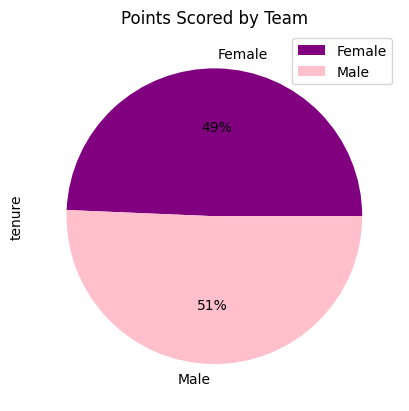

In [136]:
Telecom.groupby(['Gender']).sum().plot(kind='pie', y='tenure', autopct='%1.0f%%',
                                colors = ['purple', 'pink'],
                                title='Points Scored by Team')
plt.show

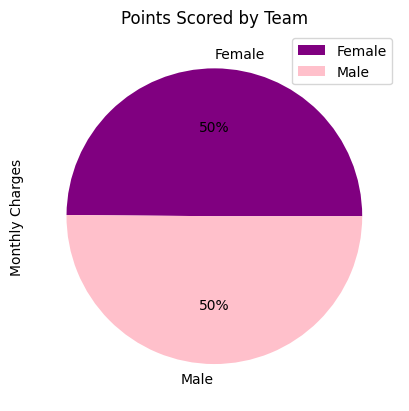

In [137]:
Telecom.groupby(['Gender']).sum().plot(kind='pie', y='Monthly Charges', autopct='%1.0f%%',
                                colors = ['purple', 'pink'],
                                title='Points Scored by Team')
plt.show()

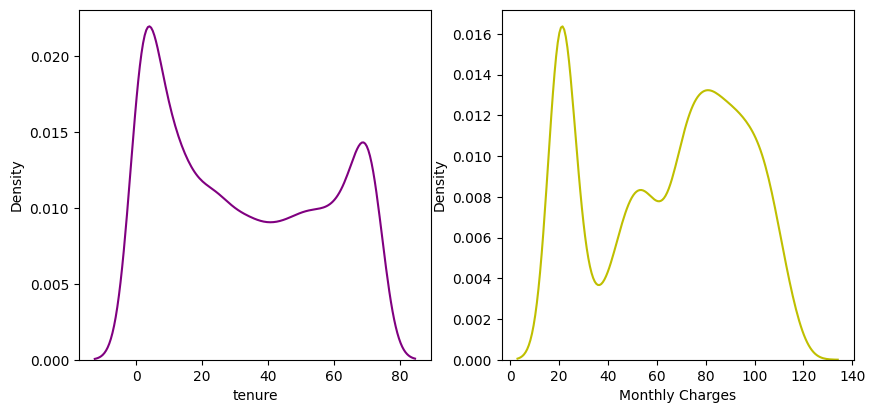

In [138]:
import seaborn as sns
fig=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(Telecom ['tenure'], color="purple")
plt.subplot(2,2,2)
sns.kdeplot(Telecom ['Monthly Charges'], color="y")
plt.show()

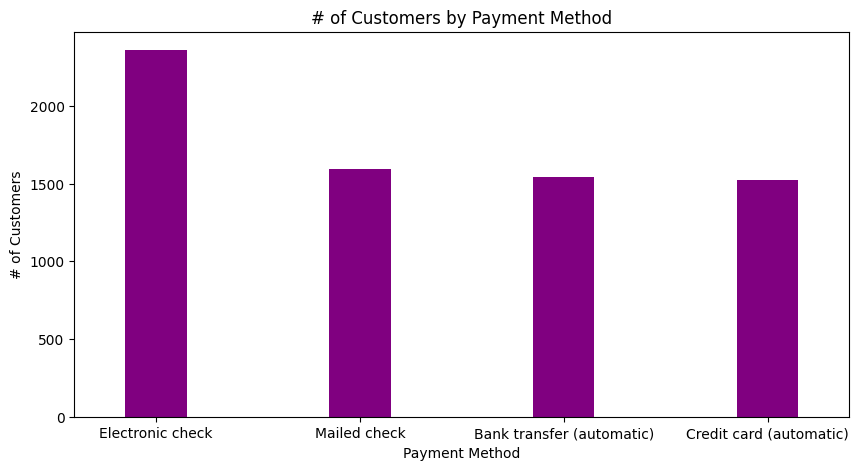

In [139]:
fig=plt.figure(figsize=(10,5))
ax = Telecom['Payment Method'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color="purple")
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Payment Method')
plt.show()

Text(0.5, 1.0, '# of Customers by Contract Type')

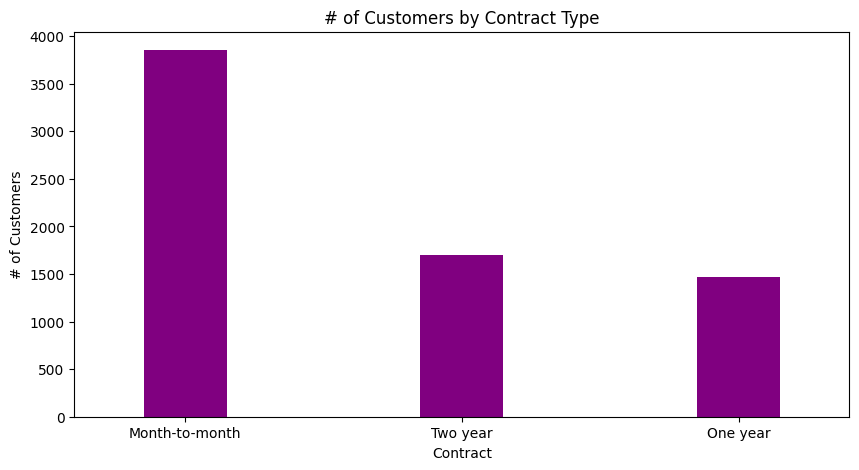

In [140]:
fig=plt.figure(figsize=(10,5))
ax = Telecom['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color="purple")
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

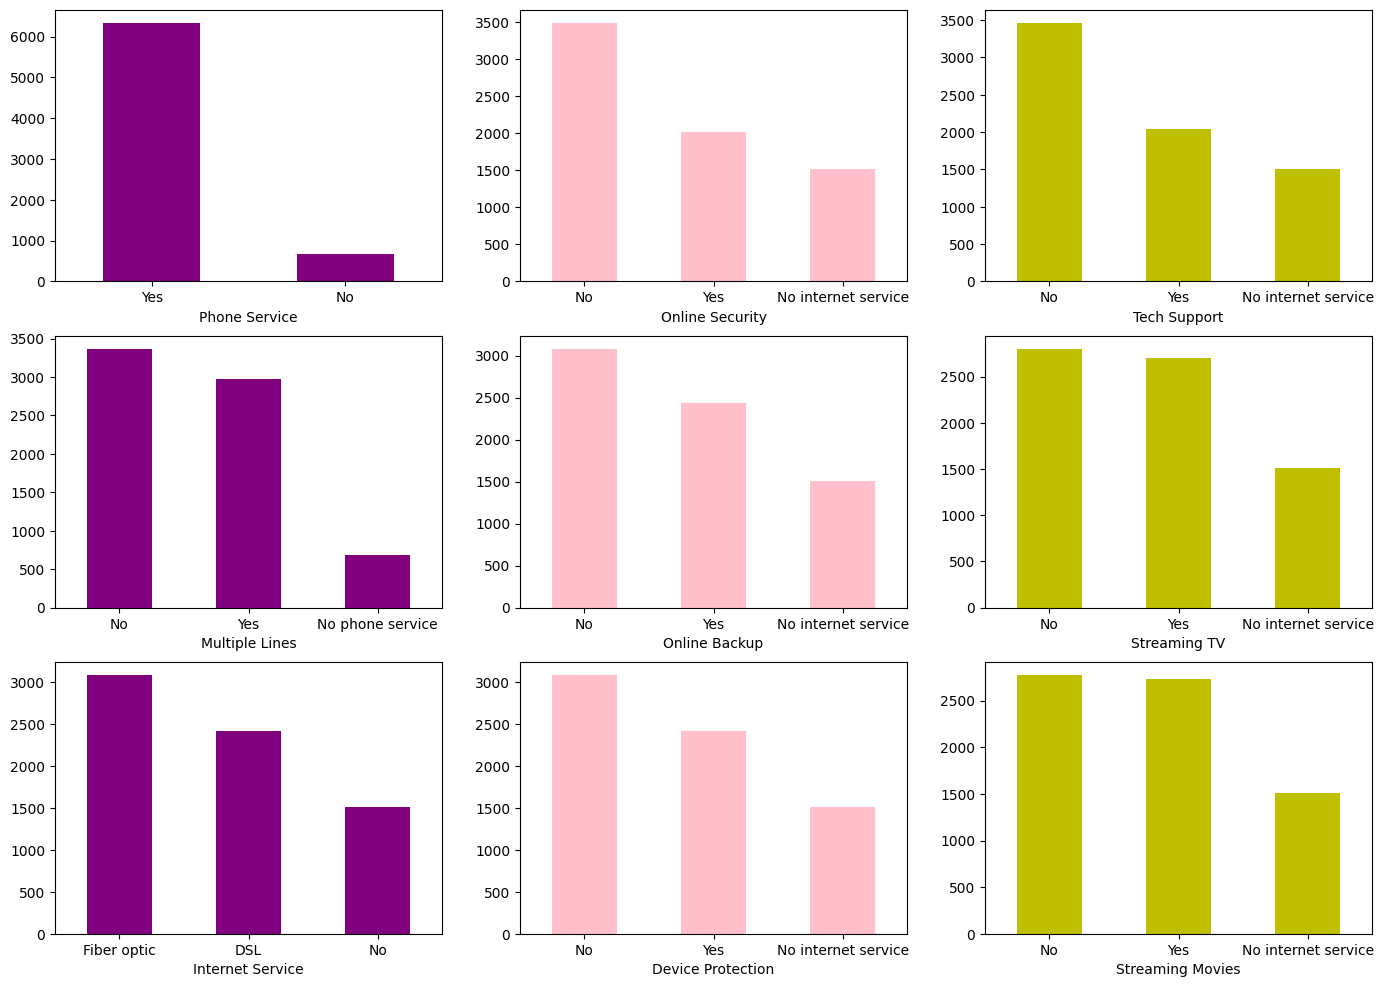

In [141]:
services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (17,12))
for i, item in enumerate(services):
    if i < 3:
        ax = Telecom[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color="purple")

    elif i >=3 and i < 6:
        ax = Telecom [item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color="pink")
    elif i < 9:
        ax = Telecom[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color="y")


<ipython-input-143-7cfafadabd1b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Telecom['tenure'], hist=True, kde=False,
<ipython-input-143-7cfafadabd1b>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Telecom['Monthly Charges'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their Monthly Charges')

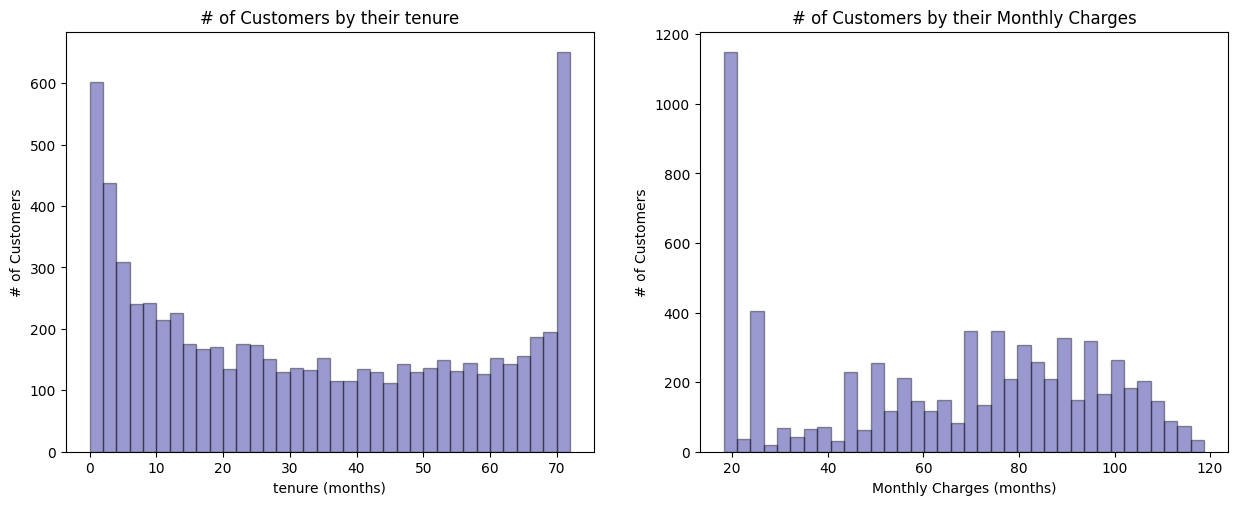

In [143]:
fig=plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
ax = sns.distplot(Telecom['tenure'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('tenure (months)')
ax.set_title('# of Customers by their tenure')

plt.subplot(2,2,2)
ax = sns.distplot(Telecom['Monthly Charges'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Monthly Charges (months)')
ax.set_title('# of Customers by their Monthly Charges')

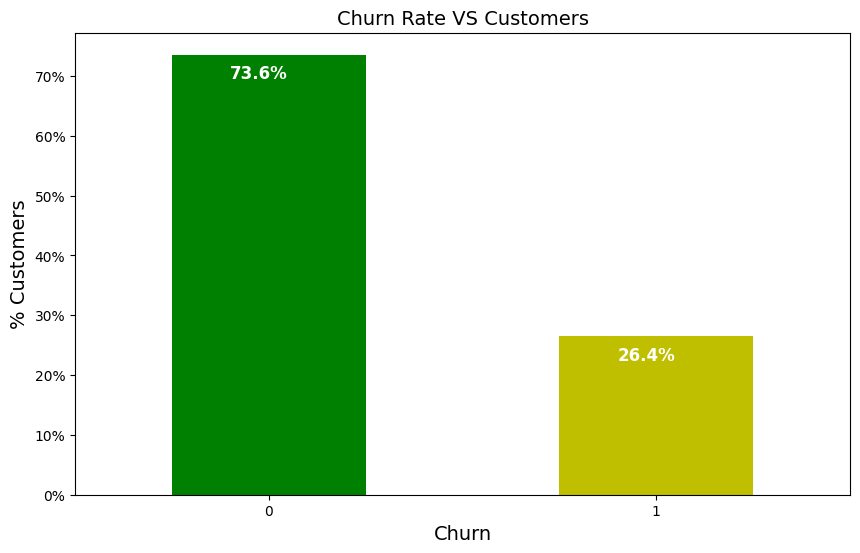

In [40]:
import matplotlib.ticker as mtick
colors = ['g','y']
ax = (Telecom['Churn'].value_counts()*100.0 /len(Telecom)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate VS Customers', size = 14)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           )


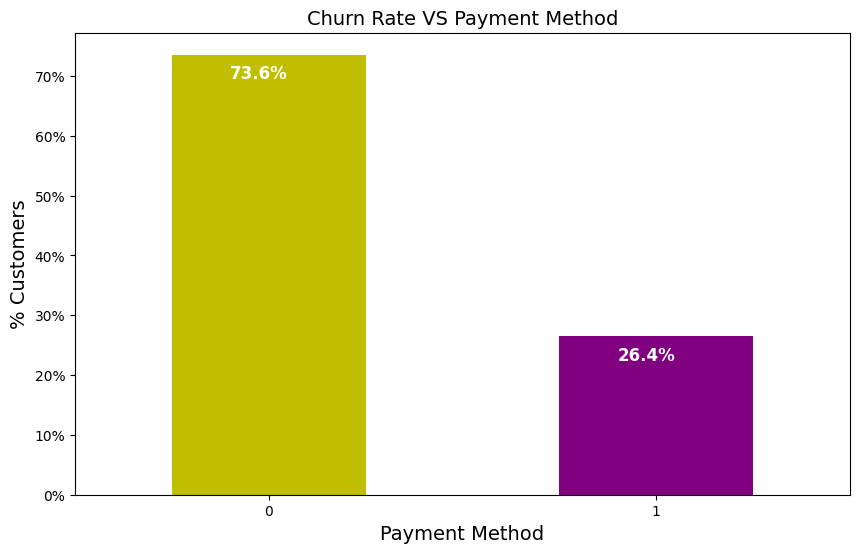

In [41]:
colors = ['y','purple']
ax = (Telecom['Churn'].value_counts()*100.0 /len(Telecom)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Payment Method',size = 14)
ax.set_title('Churn Rate VS Payment Method', size = 14)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           )

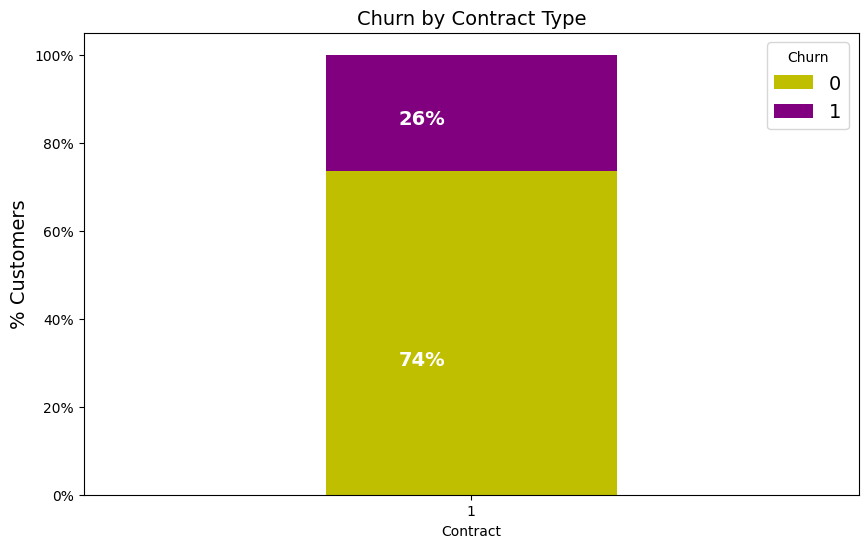

In [42]:
colors = ['y','purple']
contract_churn = Telecom.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

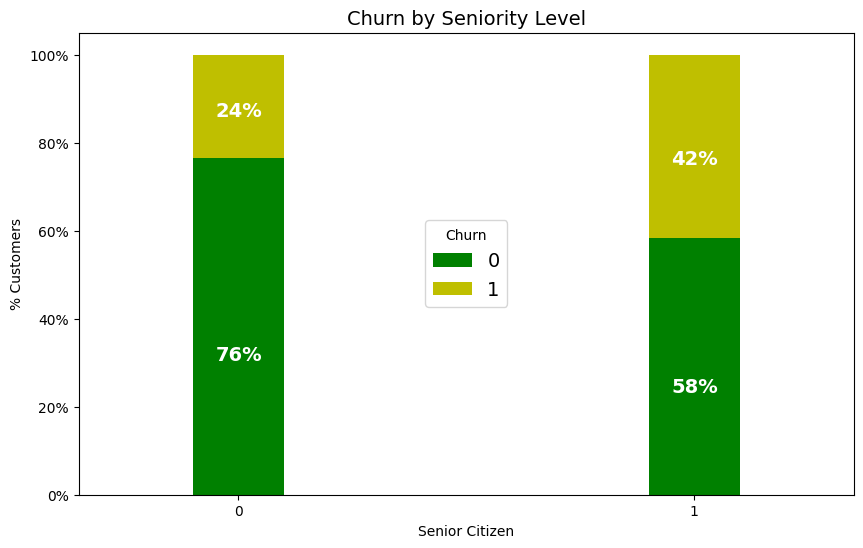

In [43]:
colors = ['g','y']
seniority_churn = Telecom.groupby(['Senior Citizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)


**#Box_Plot**

<Axes: xlabel='Internet Service', ylabel='tenure'>

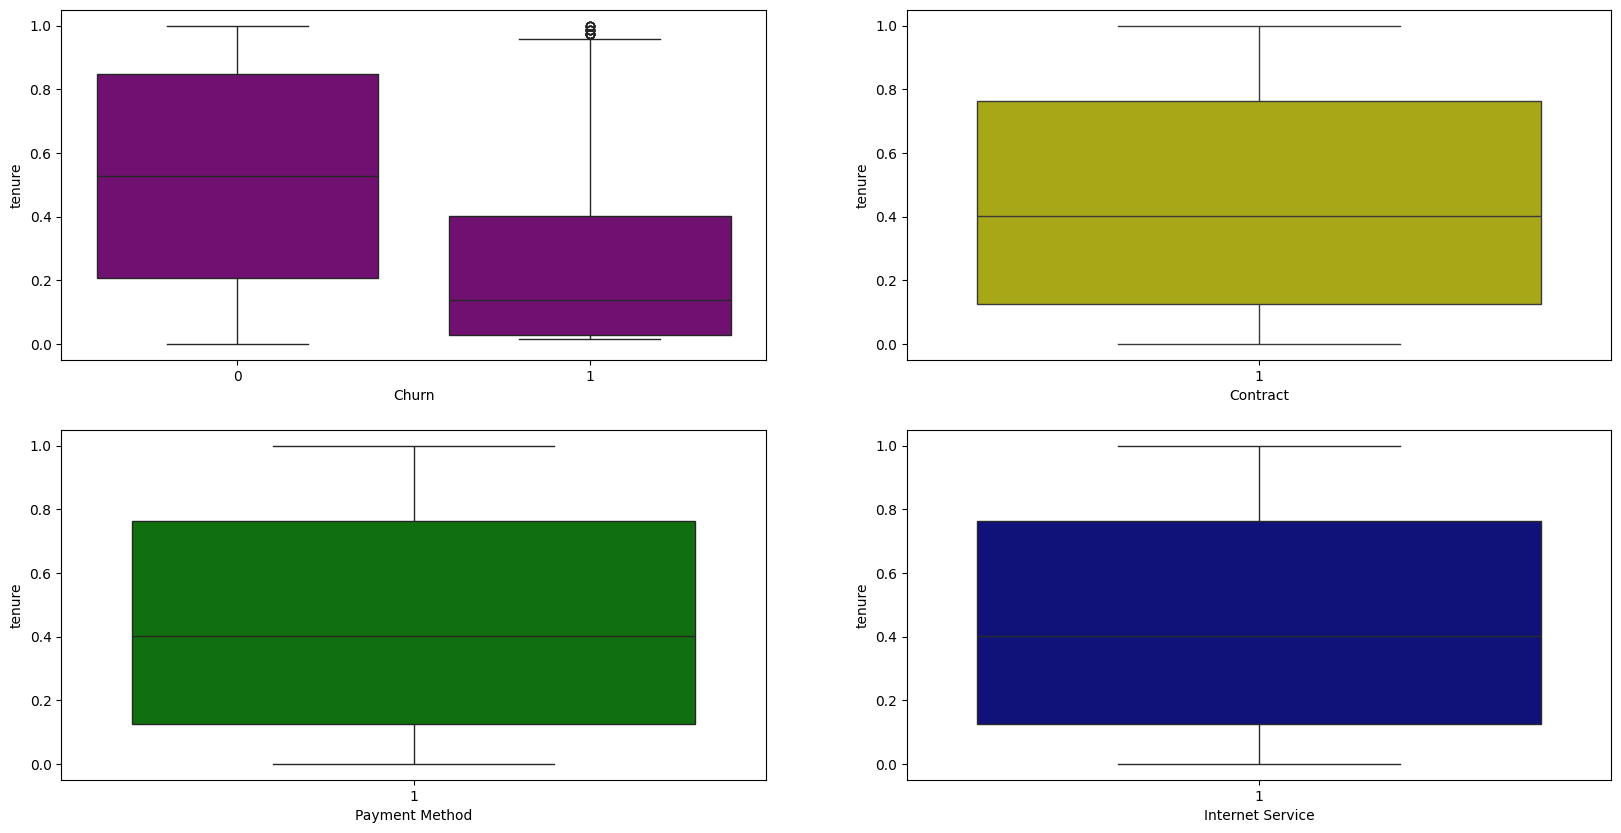

In [44]:
fig=plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x = Telecom.Churn, y = Telecom.tenure, color = "purple")
plt.subplot(2,2,2)
sns.boxplot(x = Telecom.Contract, y = Telecom.tenure, color = "y")
plt.subplot(2,2,3)
sns.boxplot(x = "Payment Method", y = "tenure", data = Telecom, color = "g")
plt.subplot(2,2,4)
sns.boxplot(x = "Internet Service", y = "tenure", data = Telecom, color = "darkblue")

**#Preprocessing_&_pliting_Libraries**

In [45]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**#Label_Encoder**

In [46]:
Telecom["Gender"]= Telecom["Gender"].apply(lambda x:0 if x== False else 1)
Telecom["Senior Citizen"]= Telecom["Senior Citizen"].apply(lambda x:0 if x== False else 1)
Telecom["Partner"]= Telecom["Partner"].apply(lambda x:0 if x== False else 1)
Telecom["Dependents"]= Telecom["Dependents"].apply(lambda x:0 if x== False else 1)
Telecom["Phone Service"]= Telecom["Phone Service"].apply(lambda x:0 if x== False else 1)
Telecom["Multiple Lines"]= Telecom["Multiple Lines"].apply(lambda x:0 if x== False else 1)
Telecom["Internet Service"]= Telecom["Internet Service"].apply(lambda x:0 if x== False else 1)
Telecom["Online Security"]= Telecom["Online Security"].apply(lambda x:0 if x== False else 1)
Telecom["Online Backup"]= Telecom["Online Backup"].apply(lambda x:0 if x== False else 1)
Telecom["Device Protection"]= Telecom["Device Protection"].apply(lambda x:0 if x== False else 1)
Telecom["Tech Support"]= Telecom["Tech Support"].apply(lambda x:0 if x== False else 1)
Telecom["Streaming TV"]= Telecom["Streaming TV"].apply(lambda x:0 if x== False else 1)
Telecom["Tech Support"]= Telecom["Tech Support"].apply(lambda x:0 if x== False else 1)
Telecom["Streaming TV"]= Telecom["Streaming TV"].apply(lambda x:0 if x== False else 1)
Telecom["Streaming Movies"]= Telecom["Streaming Movies"].apply(lambda x:0 if x== False else 1)
Telecom["Paperless Billing"]= Telecom["Paperless Billing"].apply(lambda x:0 if x== False else 1)
Telecom["Payment Method"]= Telecom["Payment Method"].apply(lambda x:0 if x== False else 1)
Telecom["Contract"]= Telecom["Contract"].apply(lambda x:0 if x== False else 1)
Telecom["Churn"]= Telecom["Churn"].apply(lambda x:0 if x== False else 1)

**#MinMax_Scaling**

**#Standard_Scaling**

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Telecom["tenure"] = sc.fit_transform(Telecom[["tenure"]])
Scaler = MinMaxScaler()
Telecom["Monthly Charges"] = Scaler.fit_transform(Telecom[["Monthly Charges"]])
Telecom["tenure"] = Scaler.fit_transform(Telecom[["tenure"]])

In [48]:
Telecom.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,1,0,1,1,0.013889,1,1,1,1,1,1,1,1,1,1,1,1,0.115423,29.85,0
2,1,0,1,1,0.472222,1,1,1,1,1,1,1,1,1,1,1,1,0.385075,1889.50,0
3,1,0,1,1,0.027778,1,1,1,1,1,1,1,1,1,1,1,1,0.354229,108.15,1
4,1,0,1,1,0.625000,1,1,1,1,1,1,1,1,1,1,1,1,0.239303,1840.75,0
5,1,0,1,1,0.027778,1,1,1,1,1,1,1,1,1,1,1,1,0.521891,151.65,1


**#Spliting_Data**

In [83]:
from sklearn.model_selection import train_test_split
x= Telecom.drop(["Churn"], axis=1)
y = Telecom["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**#Logistic_Regression**

In [84]:
from sklearn.linear_model import LogisticRegression

m1 = LogisticRegression(penalty="l2",C=10)
m1.fit(x_train,y_train)
yp = m1.predict(x_test)
ac = accuracy_score(yp,y_test)
ac

0.7807308970099668

In [85]:
m2 = LogisticRegression(penalty='l2',C=20,solver="newton-cg")
m2.fit(x_train,y_train)
yp = m2.predict(x_test)
ac = accuracy_score(yp,y_test)
ac

0.7812055054579972

**#Random_Forest_Classifier**

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

classifier = RandomForestClassifier(n_estimators = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_pred,y_test)
acc

0.7560512577123872

**#Support_Vector_Machine**

In [87]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf",C=0.1,gamma=0.1)
clf.fit(x_train,y_train)
yp = clf.predict(x_test)
ypt = clf.predict(x_train)
acct = accuracy_score(ypt,y_train)
acc= accuracy_score(yp,y_test)
acct, acc

(0.7511192511192512, 0.7508305647840532)

**#Decision_Tree_Classification**

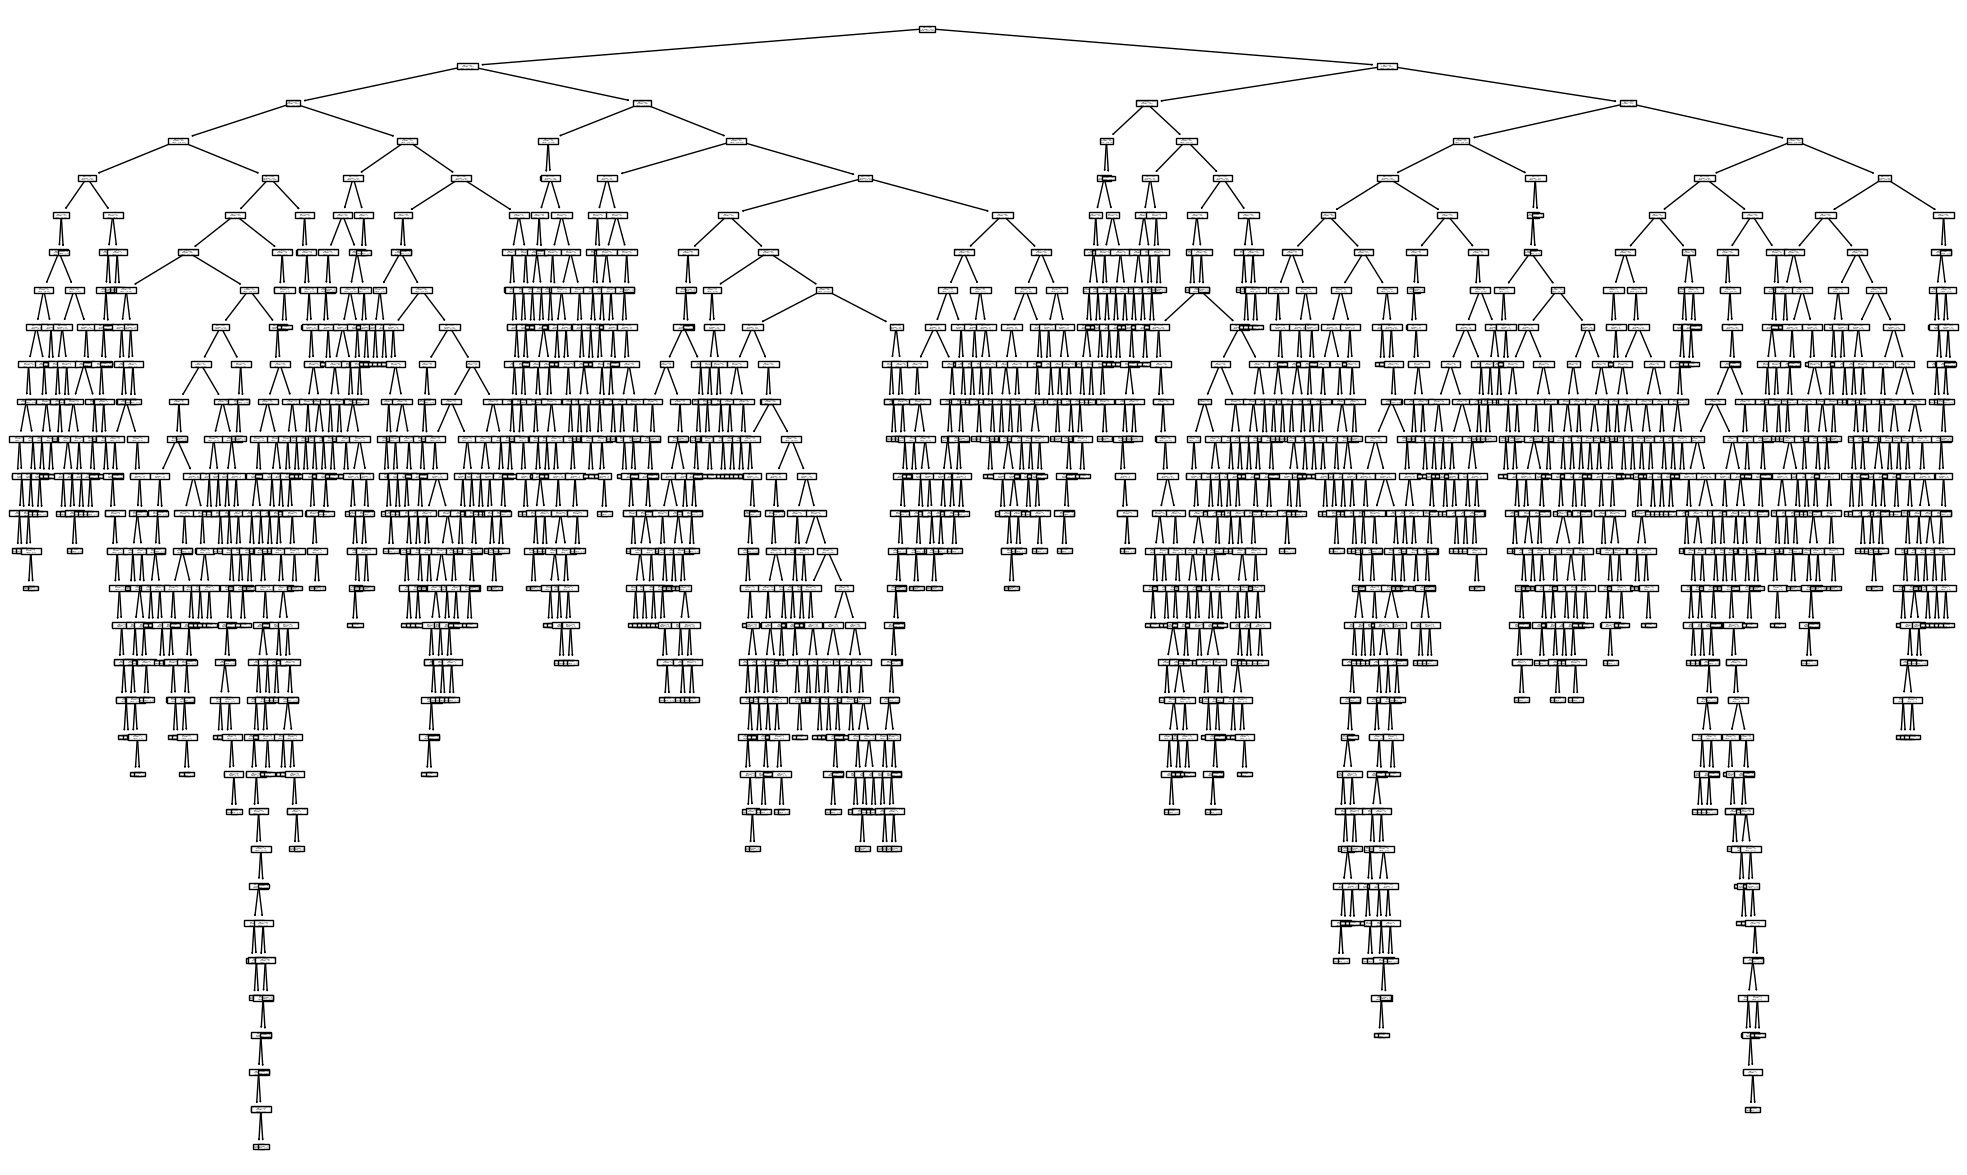

In [88]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

plt.figure(figsize=(25, 15))
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

In [89]:
ypp = dtree.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(ypp, y_test)
print(acc)

0.7133364973896535


**#Confusion_matrix**

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,ypp))

[[1271  280]
 [ 324  232]]
